# [Baseball Databank](http://www.seanlahman.com/baseball-archive/statistics/)

In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1030]:
from pathlib import Path
from typing import Tuple, Callable

In [366]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [235]:
# show matplotlib plots in notebook
%matplotlib inline

In [276]:
# set matplotlib style/theme
plt.style.use("fivethirtyeight")

In [278]:
# plotly defaults
pio.renderers.default = "notebook"
pio.templates.default = "seaborn"

In [1052]:
from tabulate import tabulate
from IPython.core.display import display, Markdown, HTML

def markdown(s: str):
    display(Markdown(s))
    
def html(s: str):
    display(HTML(s))

In [9]:
# path to data files
datapath = Path("../baseballdatabank/core")

___________________
## Batting info

In [104]:
batting_all = pd.read_csv(datapath/"batting.csv")
batting_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108789 entries, 0 to 108788
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  108789 non-null  object 
 1   yearID    108789 non-null  int64  
 2   stint     108789 non-null  int64  
 3   teamID    108789 non-null  object 
 4   lgID      108052 non-null  object 
 5   G         108789 non-null  int64  
 6   AB        108789 non-null  int64  
 7   R         108789 non-null  int64  
 8   H         108789 non-null  int64  
 9   2B        108789 non-null  int64  
 10  3B        108789 non-null  int64  
 11  HR        108789 non-null  int64  
 12  RBI       108033 non-null  float64
 13  SB        106421 non-null  float64
 14  CS        85248 non-null   float64
 15  BB        108789 non-null  int64  
 16  SO        106689 non-null  float64
 17  IBB       72139 non-null   float64
 18  HBP       105973 non-null  float64
 19  SH        102721 non-null  float64
 20  SF  

## People info

In [357]:
people = pd.read_csv(datapath/"people.csv")
for col in "debut", "finalGame":
    people[col] = pd.to_datetime(people[col])
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   playerID      20093 non-null  object        
 1   birthYear     19979 non-null  float64       
 2   birthMonth    19811 non-null  float64       
 3   birthDay      19670 non-null  float64       
 4   birthCountry  20032 non-null  object        
 5   birthState    19561 non-null  object        
 6   birthCity     19919 non-null  object        
 7   deathYear     9887 non-null   float64       
 8   deathMonth    9886 non-null   float64       
 9   deathDay      9885 non-null   float64       
 10  deathCountry  9884 non-null   object        
 11  deathState    9836 non-null   object        
 12  deathCity     9878 non-null   object        
 13  nameFirst     20056 non-null  object        
 14  nameLast      20093 non-null  object        
 15  nameGiven     20056 non-null  object

In [424]:
# slimmed people dataframe with player ID, full name, first and final games as datetimes
people_slim = pd.concat([people["playerID"], 
                         people[["nameFirst", "nameLast"]].fillna("").agg(" ".join, axis=1).rename("fullName"), 
                         people["debut"].apply(lambda dt: dt.year).fillna(0).astype(np.int), 
                         people["finalGame"].apply(lambda dt: dt.year).fillna(0).astype(np.int)], 
                        axis=1)

In [425]:
people_slim

,playerID,fullName,debut,finalGame
0,aardsda01,David Aardsma,2004,2015
1,aaronha01,Hank Aaron,1954,1976
2,aaronto01,Tommie Aaron,1962,1971
3,aasedo01,Don Aase,1977,1990
4,abadan01,Andy Abad,2001,2006
...,...,...,...,...
20088,zupofr01,Frank Zupo,1957,1961
20089,zuvelpa01,Paul Zuvella,1982,1991
20090,zuverge01,George Zuverink,1951,1959
20091,zwilldu01,Dutch Zwilling,1910,1916


_____________________
### Convenience functions

In [1017]:
# All-time <stat> leaders
def leaders(df_stat: pd.DataFrame, df_people: pd.DataFrame, stat: str, count: int=10):
    _leaders = (df_stat.pivot_table(values=stat, columns="yearID", index="playerID", fill_value=0, aggfunc=np.sum)
                  .astype(np.int)
                  .sum(axis=1)
                  .sort_values(ascending=False)
                  .rename(stat)
                  .head(count))
    return pd.merge(df_people, _leaders, on="playerID").sort_values(stat, ascending=False)

In [1024]:
# Bar-plot leaders
def leaders_barplot(df: pd.DataFrame, x: str, y: str, figsize: Tuple[int, int]=(7,6), stat_label: str=None):
    if stat_label is None:
        stat_label = y
    plt.figure(figsize=figsize)
    bp = sns.barplot(x=x, y=y, data=df, palette="crest_r")
    bp.set(xlabel=None, ylabel=f"{stat_label}", title=f"All-time {stat_label} Leaders")
    bp.set_xticklabels(bp.get_xticklabels(), rotation=60)
    plt.tight_layout()

# Players: all-time batting leaders

## HR

In [1025]:
hr_leaders = leaders(batting_all, people_slim, "HR", 10)
hr_leaders

,playerID,fullName,debut,finalGame,HR
1,bondsba01,Barry Bonds,1986,2007,762
0,aaronha01,Hank Aaron,1954,1976,755
7,ruthba01,Babe Ruth,1914,1935,714
6,rodrial01,Alex Rodriguez,1994,2016,696
4,pujolal01,Albert Pujols,2001,2020,662
3,mayswi01,Willie Mays,1951,1973,660
2,griffke02,Ken Griffey,1989,2010,630
9,thomeji01,Jim Thome,1991,2012,612
8,sosasa01,Sammy Sosa,1989,2007,609
5,robinfr02,Frank Robinson,1956,1976,586


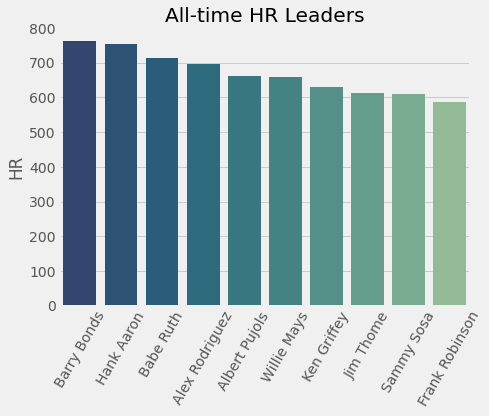

In [1026]:
# seaborn plot
leaders_barplot(hr_leaders, "fullName", "HR")

------------------
**NOTE** the bizarre name difference betwen setting ```custom_data``` and using ```customdata``` 

In [430]:
# plotly plot
bp = px.bar(hr_leaders, 
            x="fullName", 
            y="HR", 
            title="All-time HR Leaders",
            custom_data=["debut", "finalGame"])
bp.update_traces(hovertemplate="<b>%{x}</b>: %{y} (%{customdata[0]}-%{customdata[1]})")
bp.update_xaxes(title=None)

## Hits

In [421]:
h_leaders = leaders(batting_all, people_slim, "H", 10)
h_leaders

,playerID,fullName,debut,finalGame,H
6,rosepe01,Pete Rose,1963,1986,4256
2,cobbty01,Ty Cobb,1905,1928,4189
0,aaronha01,Hank Aaron,1954,1976,3771
5,musiast01,Stan Musial,1941,1963,3630
7,speaktr01,Tris Speaker,1907,1928,3514
3,jeterde01,Derek Jeter,1995,2014,3465
1,ansonca01,Cap Anson,1871,1897,3435
8,wagneho01,Honus Wagner,1897,1917,3420
9,yastrca01,Carl Yastrzemski,1961,1983,3419
4,molitpa01,Paul Molitor,1978,1998,3319


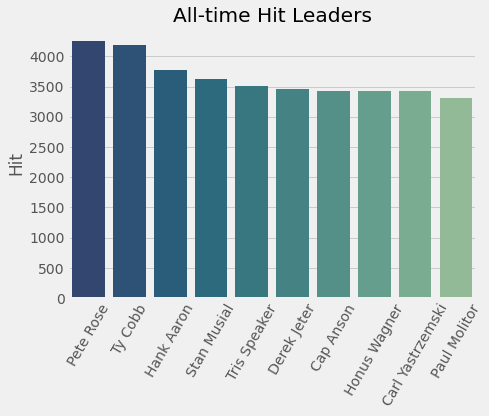

In [437]:
leaders_barplot(h_leaders, "fullName", "H", stat_label="Hit")

In [431]:
bp = px.bar(h_leaders, 
            x="fullName", 
            y="H", 
            title="All-time Hit Leaders",
            custom_data=["debut", "finalGame"])
bp.update_traces(hovertemplate="<b>%{x}</b>: %{y} (%{customdata[0]}-%{customdata[1]})")
bp.update_xaxes(title=None)
bp.update_yaxes(title="Hits")

_____________________________________________

# Team stats

In [509]:
teams = pd.read_csv(datapath/"teams.csv")

In [625]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2955 non-null   int64  
 1   lgID            2905 non-null   object 
 2   teamID          2955 non-null   object 
 3   franchID        2955 non-null   object 
 4   divID           1438 non-null   object 
 5   Rank            2955 non-null   int64  
 6   G               2955 non-null   int64  
 7   Ghome           2556 non-null   float64
 8   W               2955 non-null   int64  
 9   L               2955 non-null   int64  
 10  DivWin          1410 non-null   object 
 11  WCWin           774 non-null    object 
 12  LgWin           2927 non-null   object 
 13  WSWin           2598 non-null   object 
 14  R               2955 non-null   int64  
 15  AB              2955 non-null   int64  
 16  H               2955 non-null   int64  
 17  2B              2955 non-null   i

-----------------------------
##### Look at how/if certain stats have changed over time.
scaling per-game seems reasonable since the number of games per season 
- increased significantly between the 1871 and 1905
- increased slightly around 1960
- has infrequent but significant changes (e.g. 2020)

i.e. ....

[Text(0.5, 1.0, 'Games per season'), Text(0.5, 0, ''), Text(0, 0.5, '')]

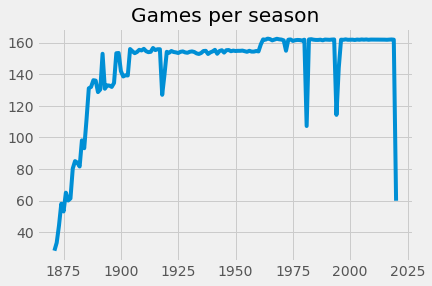

In [795]:
sns_lp = sns.lineplot(data=teams.pivot_table(index="yearID", values="G"), x="yearID", y="G")
sns_lp.set(title="Games per season", xlabel=None, ylabel=None)

--------------------------

In [705]:
from itertools import chain

In [707]:
def stat_per_game(stats):
    df = teams.pivot_table(index="yearID", 
                           values=chain(stats, ["G"]), 
                           aggfunc=np.sum)
    return df.divide(df["G"], axis="index") \
             .drop("G", axis=1) \
             .reset_index()

_____________________________
## Offense over time

In [736]:
off_stats = ["H", "R", "HR", "BB"]
off_per_game = stat_per_game(off_stats)
off_per_game.head(2)

,yearID,BB,H,HR,R
0,1871,1.547244,12.208661,0.185039,10.468504
1,1872,0.718579,12.204918,0.101093,9.262295


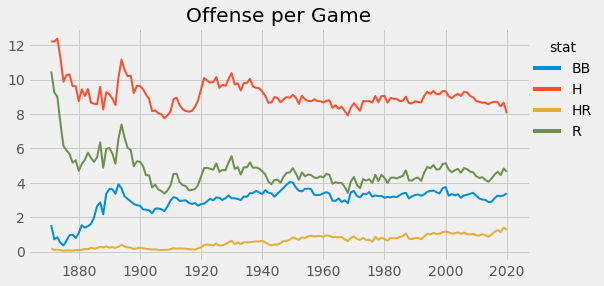

In [761]:
plt.figure(figsize=(8,4))
sns_lp = sns.lineplot(x='yearID', 
             y='value', 
             hue='variable', 
             data=pd.melt(off_per_game, ['yearID']), 
             linewidth=2)
sns_lp.set(xlabel=None, ylabel=None, title="Offense per Game")
plt.legend(title="stat", bbox_to_anchor=(1.15, 1), loc='upper right', frameon=False)

In [722]:
bp = px.line(off_per_game, 
            x="yearID",
            y=["HR", "H", "R", "BB"],
            title="Offense per Game")
bp.update_traces(hovertemplate="<b>%{x}</b><br>%{y:.3f}", line=dict(width=3))
bp.update_layout(legend=dict(title="stat"))
bp.update_xaxes(title=None)
bp.update_yaxes(title=None)
bp.show()

It seems like these offensive stats really haven't changed all that much since about 1920 (though some have *slightly* increased).

## Defense over time

In [796]:
# Pitching/fielding-focused, since several stats (HRA, RA, HRA, etc) are just the inverse of above
def_stats = ["SOA", "E", "DP"]
def_per_game = stat_per_game(def_stats)

# handle ERA separately since it's already an average and scaling per-game presents a somewhat confusing value
df = teams.pivot_table(index="yearID", 
                       values="ERA", 
                       aggfunc=np.mean)

def_per_game = pd.merge(def_per_game, df, on="yearID")
def_per_game.tail(2)

,yearID,DP,E,SOA,ERA
148,2019,0.825237,0.596542,8.814944,4.497000
149,2020,0.797327,0.577394,8.678174,4.447667


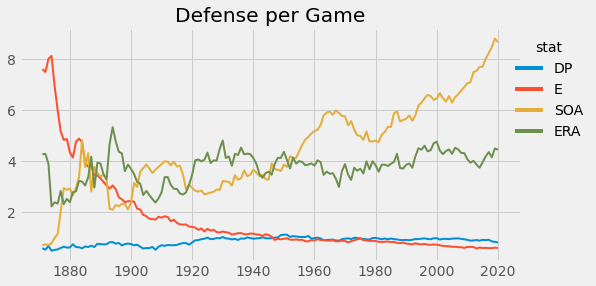

In [785]:
plt.figure(figsize=(8,4))
sns_lp = sns.lineplot(x='yearID', 
             y='value', 
             hue='variable', 
             data=pd.melt(def_per_game, ['yearID']), 
             linewidth=2)
sns_lp.set(xlabel=None, ylabel=None, title="Defense per Game")
plt.legend(title="stat", bbox_to_anchor=(1.15, 1), loc='upper right', frameon=False)

In [788]:
bp = px.line(def_per_game, 
            x="yearID",
            y=def_stats + ["ERA"],
            title="Defense per Game")
bp.update_traces(hovertemplate="<b>%{x}</b><br>%{y:.3f}", line=dict(width=3))
bp.update_layout(legend=dict(title="stat"))
bp.update_xaxes(title=None)
bp.update_yaxes(title=None)
bp.show()

Defensive stats have varied a bit more than offensive, but still within a relatively limited range. Strikeouts (```SOA```) have notably increased, while double-plays (```DP```) and errors (```E```) have slightly decreased over the past few decades. ERA has been steady, albeit with some small variance.

___________________
## W/L records

In [1005]:
# translate franchID to team name(s)
def franch_to_name(franchID: str):
    return "/".join(teams[teams["franchID"] == franchID]["name"].unique())

In [987]:
teams["Win %"] = teams["W"] / teams["G"]

In [996]:
# best record in any season
best = teams.loc[teams["Win %"].idxmax()][["franchID", "yearID", "G", "W", "Win %"]]

In [997]:
# best record in a 160+ game season
df = teams[teams["G"] >= 160]
best_160 = df.loc[df["Win %"].idxmax()][["franchID", "yearID", "G", "W", "Win %"]]

In [998]:
# worst record in any season
worst = teams.loc[teams["Win %"].idxmin()][["franchID", "yearID", "G", "W", "Win %"]]

In [999]:
# worst record in a 160+ game season
df = teams[teams["G"] >= 160]
worst_160 = df.loc[df["Win %"].idxmin()][["franchID", "yearID", "G", "W", "Win %"]]

In [1000]:
# most wins in any season
most_wins = df.loc[df["W"].idxmax()][["franchID", "yearID","G", "W", "Win %"]]

In [1015]:
# stitch together the various records, rename for readable columns, translate franchise ID to team name(s)
franchise_records = pd.DataFrame([most_wins, best, best_160, worst, worst_160], 
                                 index=["Most wins",
                                        "Best record", 
                                        "Best record (160+ games)",
                                        "Worst Record",
                                        "Worst Record (160+ games)"]
                                ).rename({"franchID": "team",
                                          "yearID": "year",
                                          "W": "wins",
                                          "G": "games"}, axis=1)
                                        
franchise_records["team"] = franchise_records["team"].apply(franch_to_name)
franchise_records

,team,year,games,wins,Win %
Most wins,Seattle Mariners,2001,162,116,0.716049
Best record,Boston Red Stockings,1875,82,71,0.865854
Best record (160+ games),Seattle Mariners,2001,162,116,0.716049
Worst Record,Washington Nationals,1872,11,0,0.000000
Worst Record (160+ games),New York Mets,1962,161,40,0.248447


--------------------------

In [1038]:
# W/L per team per year
win_pct = teams.pivot_table(index="franchID", columns="yearID", values="Win %")
win_pct_20s = win_pct.dropna(thresh=20)

In [1035]:
def season_record(df: pd.DataFrame, x: Callable[[pd.DataFrame], int]) -> Tuple[str, int]:
    seasons = (df > 0.500).sum(axis=1)
    team = seasons.idxmax()
    return(team, seasons[team])

##### Most winning seasons

In [1081]:
team_h_any, high_any = season_record(win_pct, pd.DataFrame.idxmax)
team_h_20, high_20 = season_record(win_pct_20s, pd.DataFrame.idxmax)
team_l_any, low_any = season_record(win_pct, pd.DataFrame.idxmin)
team_l_20, low_20 = season_record(win_pct_20s, pd.DataFrame.idxmin)

In [1086]:
html(tabulate([["max (overall)", high_any, franch_to_name(team_h_any)],
               ["max (20+ seasons)", high_20, franch_to_name(team_h_20)],
               ["min (overall)", low_any, franch_to_name(team_l_any)],
               ["min (20+ seasons)", low_20, franch_to_name(team_l_20)],

              ], 
              tablefmt="html", 
              headers=["Category", "Winning Seasons", "Franchise"],
              stralign="center", numalign="center"))

Category,Winning Seasons,Franchise
max (overall),97,Baltimore Orioles/New York Highlanders/New York Yankees
max (20+ seasons),97,Baltimore Orioles/New York Highlanders/New York Yankees
min (overall),97,Baltimore Orioles/New York Highlanders/New York Yankees
min (20+ seasons),97,Baltimore Orioles/New York Highlanders/New York Yankees


##### Highest average winning percentage

In [926]:
df = (win_pct > 0.500).mean(axis=1)
team = df.idxmax()
markdown(f"{team}, {df[team]:.3f}")

New York Yankees, 0.613

##### Lowest average winning percentage

In [930]:
df = (win_pct > 0.500).mean(axis=1)
team = df.idxmin()
markdown(f"{team}, {df[team]:.3f}")

Altoona Mountain City, 0.000

##### Current teams (1998+) win percentages

In [933]:
teams.loc[teams["yearID"] >= 1998].pivot_table(index="name", columns="yearID", values="Win %")

yearID,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
name,,,,,,,,,,,,,,,,,,,,,
Anaheim Angels,0.524691,0.432099,0.506173,0.462963,0.611111,0.475309,0.567901,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona Diamondbacks,0.401235,0.617284,0.524691,0.567901,0.604938,0.518519,0.314815,0.475309,0.469136,0.555556,...,0.580247,0.500000,0.500000,0.395062,0.487654,0.425926,0.574074,0.506173,0.524691,0.416667
Atlanta Braves,0.654321,0.635802,0.586420,0.543210,0.627329,0.623457,0.592593,0.555556,0.487654,0.518519,...,0.549383,0.580247,0.592593,0.487654,0.413580,0.422360,0.444444,0.555556,0.598765,0.583333
Baltimore Orioles,0.487654,0.481481,0.456790,0.388889,0.413580,0.435583,0.481481,0.456790,0.432099,0.425926,...,0.425926,0.574074,0.524691,0.592593,0.500000,0.549383,0.462963,0.290123,0.333333,0.416667
Boston Red Sox,0.567901,0.580247,0.524691,0.509317,0.574074,0.586420,0.604938,0.586420,0.530864,0.592593,...,0.555556,0.425926,0.598765,0.438272,0.481481,0.574074,0.574074,0.666667,0.518519,0.400000
Chicago Cubs,0.552147,0.413580,0.401235,0.543210,0.413580,0.543210,0.549383,0.487654,0.407407,0.524691,...,0.438272,0.376543,0.407407,0.450617,0.598765,0.635802,0.567901,0.582822,0.518519,0.566667
Chicago White Sox,0.490798,0.462963,0.586420,0.512346,0.500000,0.530864,0.512346,0.611111,0.555556,0.444444,...,0.487654,0.524691,0.388889,0.450617,0.469136,0.481481,0.413580,0.382716,0.447205,0.583333
Cincinnati Reds,0.475309,0.588957,0.521472,0.407407,0.481481,0.425926,0.469136,0.447853,0.493827,0.444444,...,0.487654,0.598765,0.555556,0.469136,0.395062,0.419753,0.419753,0.413580,0.462963,0.516667
Cleveland Indians,0.549383,0.598765,0.555556,0.561728,0.456790,0.419753,0.493827,0.574074,0.481481,0.592593,...,0.493827,0.419753,0.567901,0.524691,0.503106,0.583851,0.629630,0.561728,0.574074,0.583333


______________________________________________